In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS

sns.set_theme(palette='bright')

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS, compression='zip')

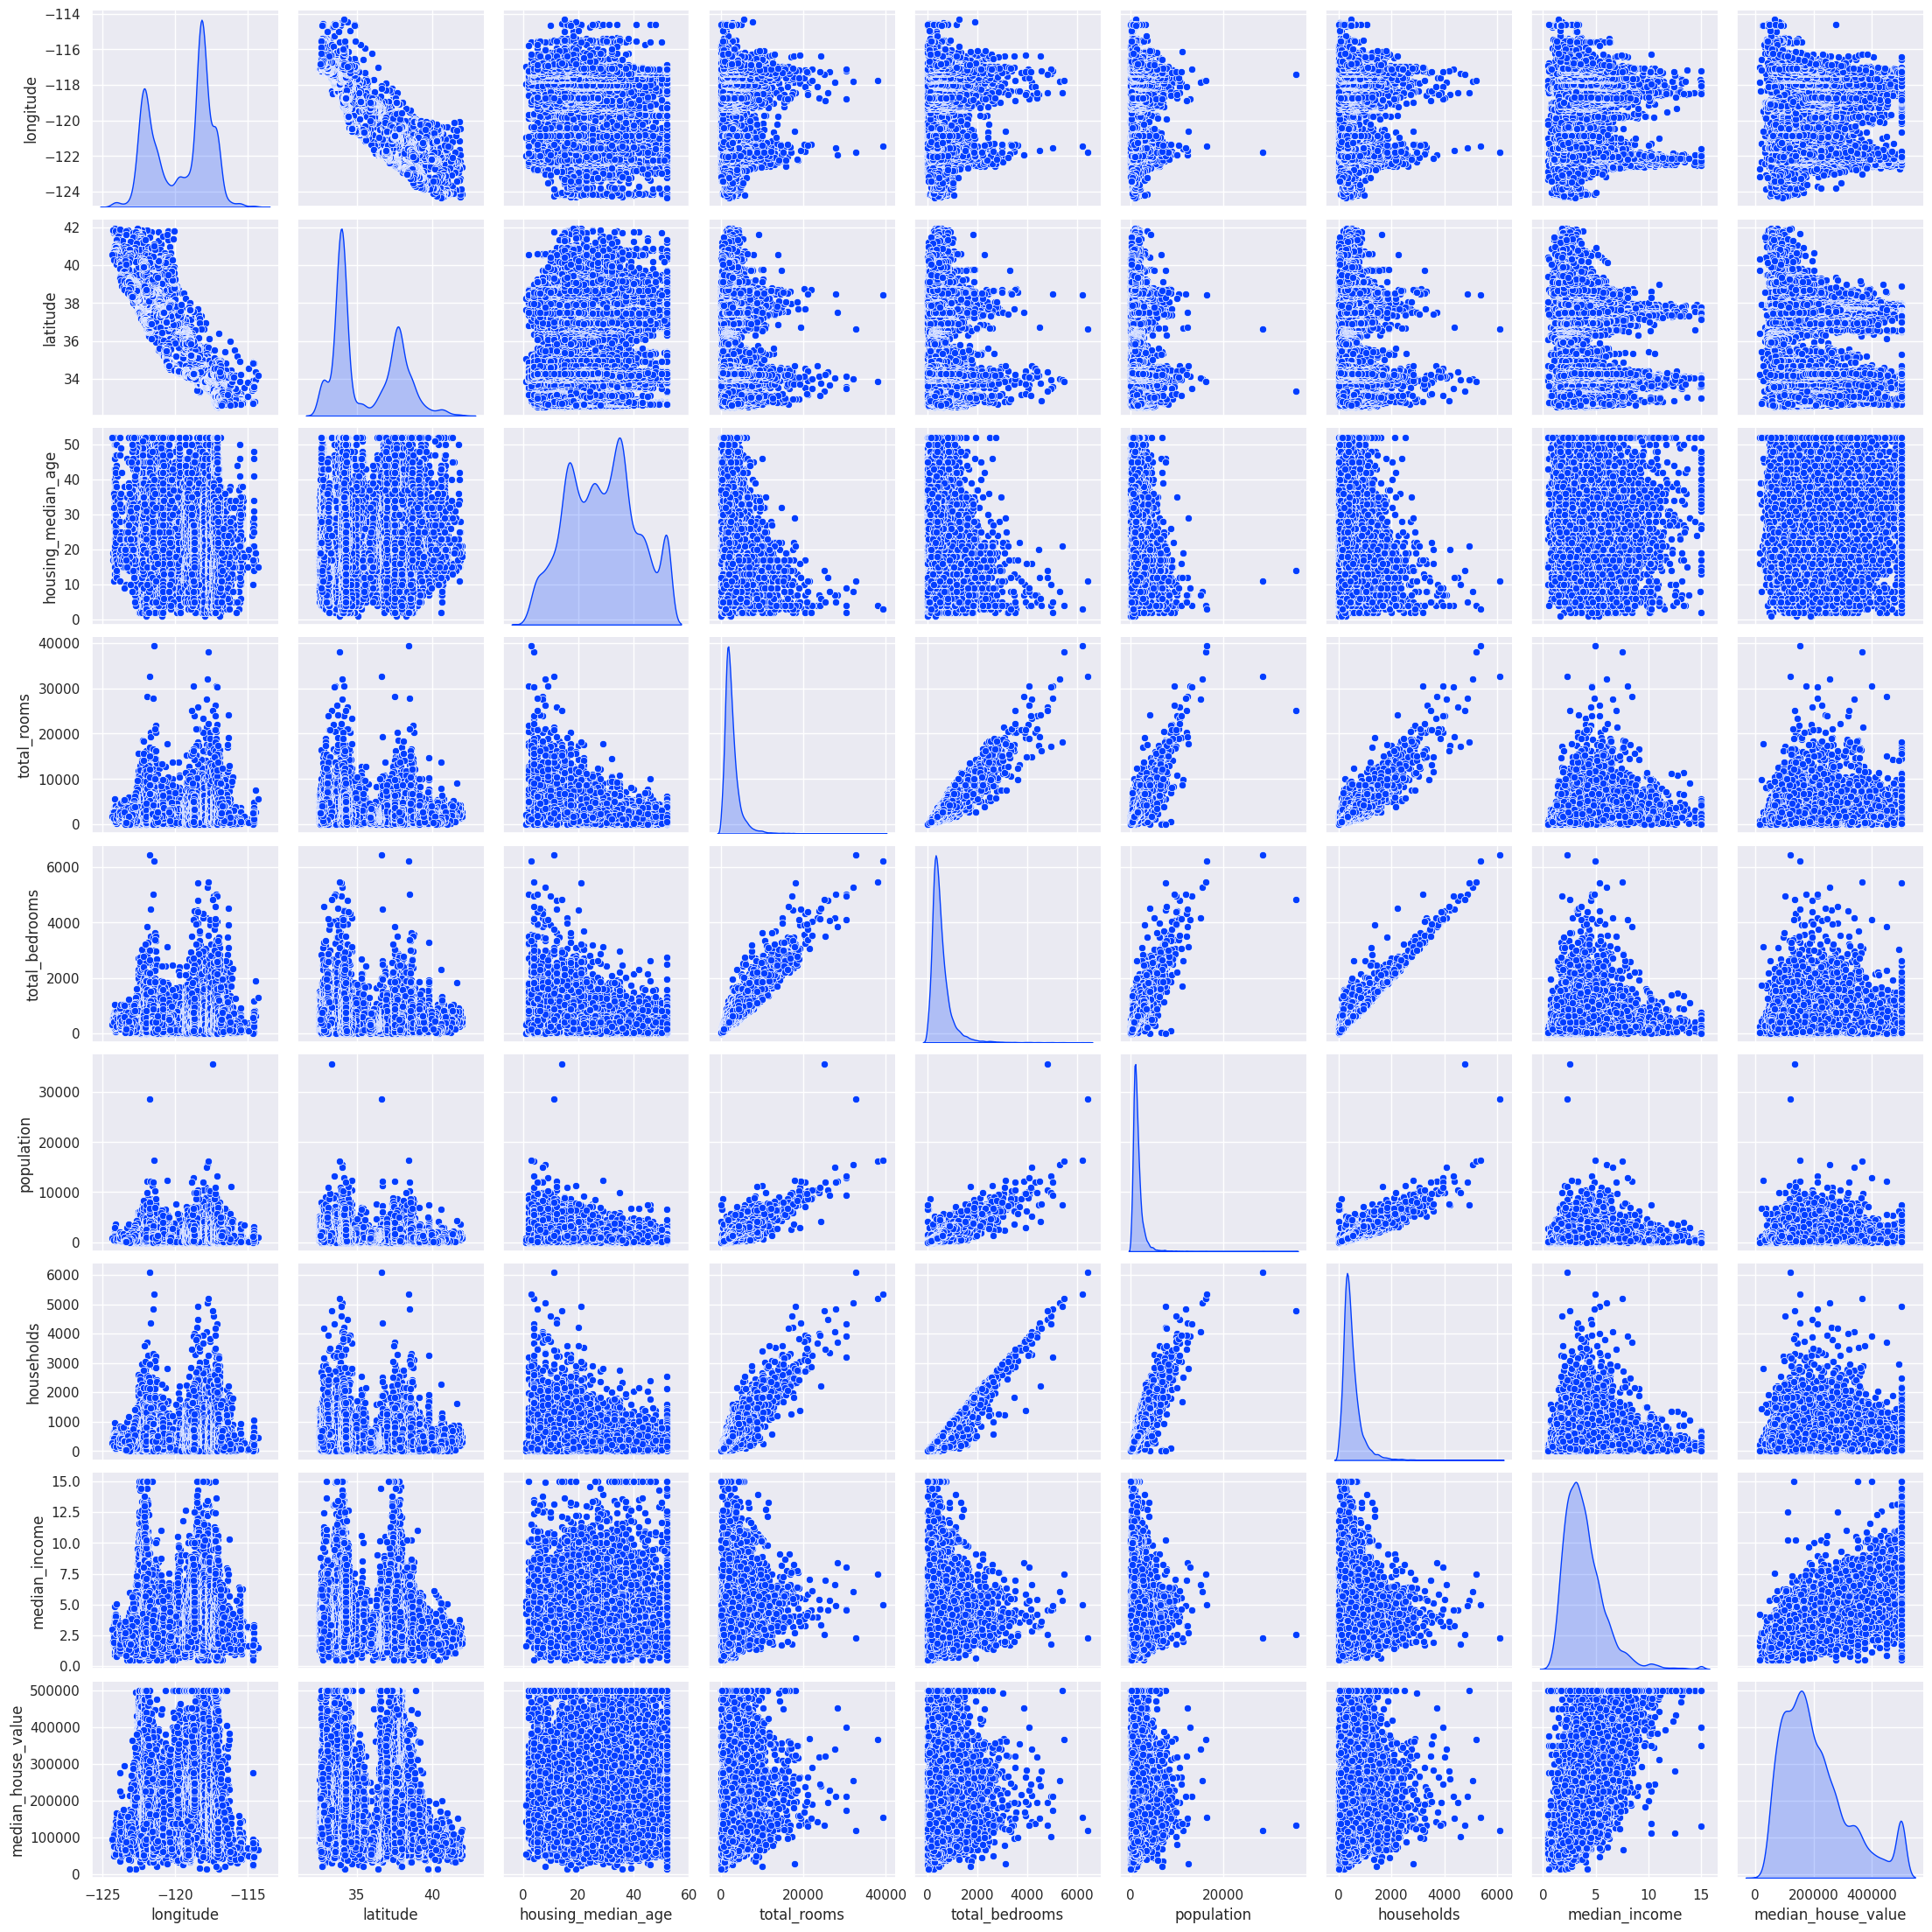

In [3]:
sns.pairplot(df, diag_kind='kde')

In [4]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [5]:
df[df.isnull().any(axis=1)].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


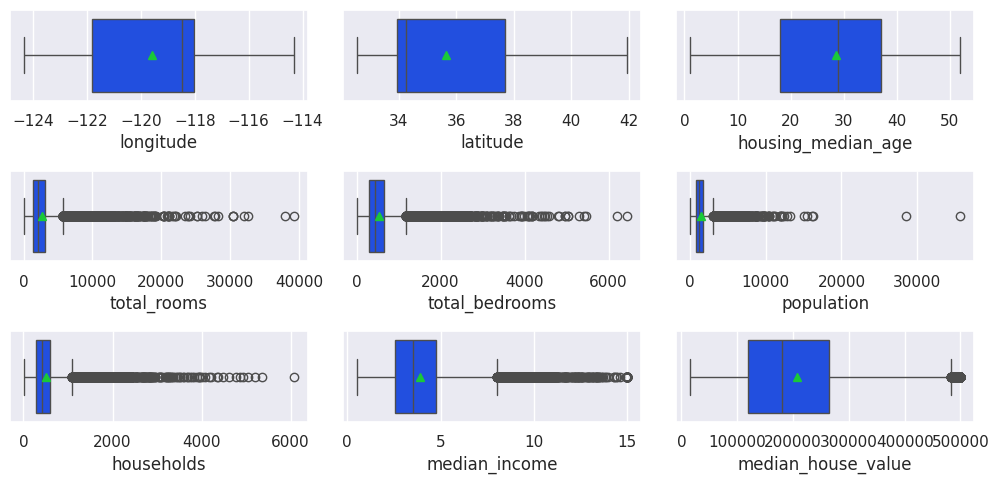

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(10, 5))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

In [7]:
df_clean = df.copy()

In [8]:
df_clean['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [9]:
df_clean['median_income_cat'] = pd.cut(
    df_clean['median_income'],
    labels=[1, 2, 3, 4, 5],
    bins = [0, 1.5, 3, 4.5, 6, np.inf]
)

<Axes: xlabel='median_income_cat'>

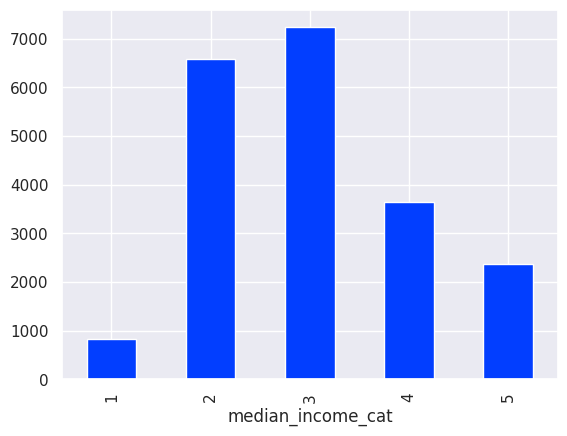

In [10]:
df_clean["median_income_cat"].value_counts().sort_index().plot(kind="bar")

In [11]:
df_clean["rooms_per_household"] = df_clean["total_rooms"] / df_clean["households"]
df_clean["population_per_household"] = df_clean["population"] / df_clean["households"]
df_clean["bedrooms_per_room"] = df_clean["total_bedrooms"] / df_clean["total_rooms"]

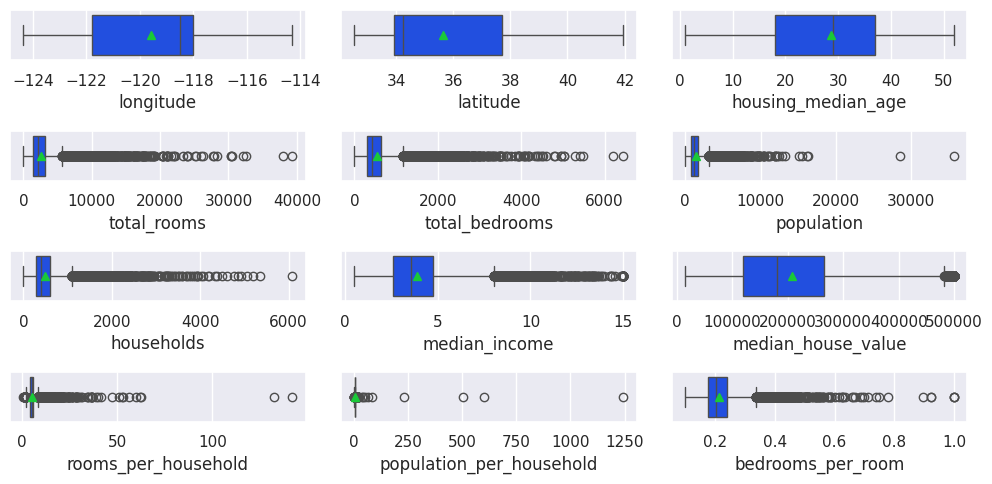

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(10, 5))

for ax, coluna in zip(axs.flatten(), df_clean.select_dtypes("number").columns):
    sns.boxplot(data=df_clean, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

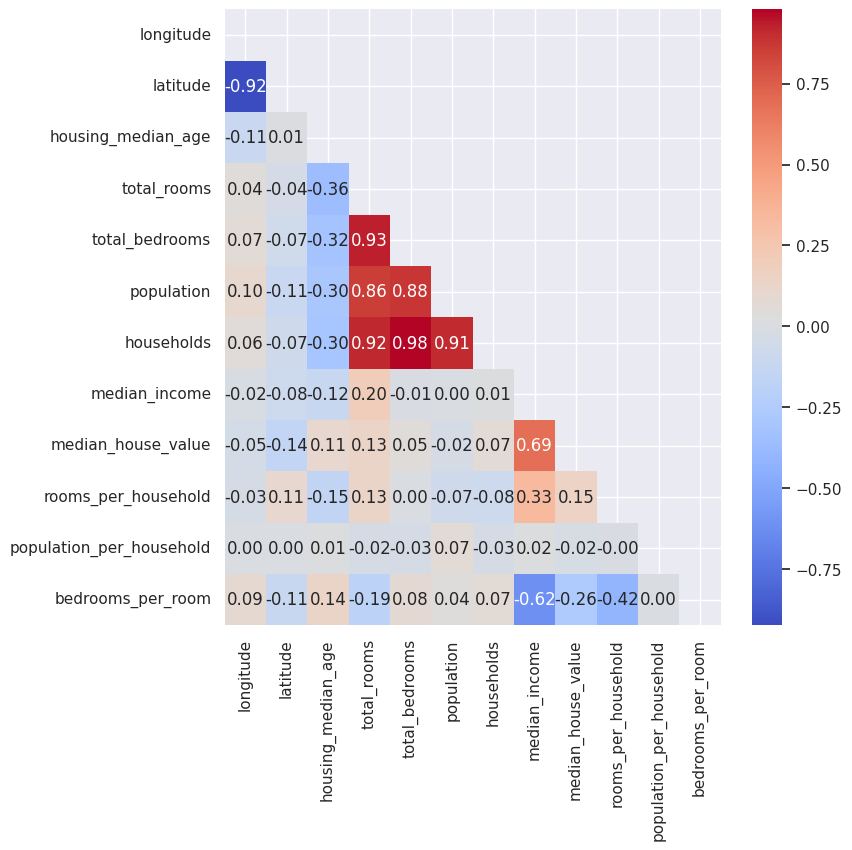

In [13]:
matriz = np.triu(df_clean.select_dtypes("number").corr())

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    df_clean.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap='coolwarm'
)

plt.show()

In [14]:
df_clean[
    df_clean["median_house_value"] == df_clean["median_house_value"].max()
]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,1,2.929412,4.658824,0.313253
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,1,2.436000,5.396000,0.387521
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,5,7.794393,2.415888,0.134892
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,5,7.512097,2.754032,0.127214
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,5,8.282548,2.623269,0.126756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,4,6.958333,2.666667,0.174983
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,5,9.890756,3.487395,0.117247
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,5,7.236059,2.553439,0.142692
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,5,9.873315,3.177898,0.111657


In [15]:
df_clean["median_house_value"].quantile(0.95)

np.float64(489809.9999999999)

In [16]:
QUANTIL = 0.99

df_clean = df_clean[
    (df_clean["housing_median_age"] < df_clean["housing_median_age"].quantile(QUANTIL))
    & (df_clean["total_rooms"] < df_clean["total_rooms"].quantile(QUANTIL))
    & (df_clean["total_bedrooms"] < df_clean["total_bedrooms"].quantile(QUANTIL))
    & (df_clean["population"] < df_clean["population"].quantile(QUANTIL))
    & (df_clean["households"] < df_clean["households"].quantile(QUANTIL))
    & (df_clean["median_income"] < df_clean["median_income"].quantile(QUANTIL))
    & (df_clean["median_house_value"] < df_clean["median_house_value"].quantile(QUANTIL))
    & (df_clean["rooms_per_household"] < df_clean["rooms_per_household"].quantile(QUANTIL))
    & (df_clean["population_per_household"] < df_clean["population_per_household"].quantile(QUANTIL))
    & (df_clean["bedrooms_per_room"] < df_clean["bedrooms_per_room"].quantile(QUANTIL))
]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17566 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17566 non-null  float64 
 1   latitude                  17566 non-null  float64 
 2   housing_median_age        17566 non-null  float64 
 3   total_rooms               17566 non-null  float64 
 4   total_bedrooms            17566 non-null  float64 
 5   population                17566 non-null  float64 
 6   households                17566 non-null  float64 
 7   median_income             17566 non-null  float64 
 8   median_house_value        17566 non-null  float64 
 9   ocean_proximity           17566 non-null  object  
 10  median_income_cat         17566 non-null  category
 11  rooms_per_household       17566 non-null  float64 
 12  population_per_household  17566 non-null  float64 
 13  bedrooms_per_room         17566 non-null  float64 


In [17]:
df_clean = df_clean.loc[df_clean['ocean_proximity'] != 'ISLAND']

In [18]:
colunas_valores_inteiros = []

for coluna in df_clean.select_dtypes("number").columns:
    if df_clean[coluna].apply(float.is_integer).all():
        colunas_valores_inteiros.append(coluna)

colunas_valores_inteiros

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_house_value']

In [19]:
colunas_valores_float = df_clean.select_dtypes("number").columns.difference(colunas_valores_inteiros)

colunas_valores_float

Index(['bedrooms_per_room', 'latitude', 'longitude', 'median_income',
       'population_per_household', 'rooms_per_household'],
      dtype='object')

In [20]:
df_clean[colunas_valores_inteiros] = df_clean[colunas_valores_inteiros].apply(
    pd.to_numeric, downcast="integer"
)

df_clean[colunas_valores_float] = df_clean[colunas_valores_float].apply(
    pd.to_numeric, downcast="float"
)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17564 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  object  
 10  median_income_cat         17564 non-null  category
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  float32 


In [21]:
df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category')

In [22]:
df_clean.to_parquet(DADOS_TRATADOS, index=False)